# Proyek Analisis Data: [Air Quality Guanyuan]
- **Nama:** [Ruvina Febrianti Malelak]
- **Email:** [ruvinamalelak@gmail.com]
- **ID Dicoding:** [ruvina_malelak]

## Menentukan Pertanyaan Bisnis

- Kapan periode waktu dengan tingkat polusi tertinggi di Guanyuan?
(Berdasarkan bulan atau musim, kapan polusi udara mencapai puncaknya?)
- Bagaimana tren kualitas udara harian di Guanyuan? Apakah ada hari tertentu dalam seminggu di mana kualitas udara cenderung lebih buruk?
- Apakah ada hubungan antara konsentrasi polutan (PM2.5, PM10, SO2, NO2, CO, O3) dengan variabel cuaca seperti suhu, tekanan udara, titik embun, hujan, arah angin, dan kecepatan angin di Guanyuan?

## Import Semua Packages/Library yang Digunakan

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

- Mengumpulkan data

In [10]:
guanyuanDf = pd.read_csv("./data/PRSA_Data_Guanyuan_20130301-20170228.csv")
guanyuanDf

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


- Membuat datetime

In [43]:
years = guanyuanDf['year'].values
months = guanyuanDf['month'].values
days = guanyuanDf['day'].values
hours = guanyuanDf['hour'].values
full_date = []

for i in range(guanyuanDf.shape[0]):
    date_time = str(years[i])+'-'+str(months[i])+'-'+str(days[i])+' '+str(hours[i])+':'+str(0)
    full_date.append(date_time)

dates = pd.to_datetime(full_date)
dates = pd.DataFrame(dates,columns=['date'])
guanyuanDf = pd.concat([dates,guanyuanDf],axis=1)
guanyuanDf

,date,date,date,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013-03-01 00:00:00,2013-03-01 00:00:00,2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2013-03-01 01:00:00,2013-03-01 01:00:00,2013-03-01 01:00:00,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,2013-03-01 02:00:00,2013-03-01 02:00:00,2013-03-01 02:00:00,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,2013-03-01 03:00:00,2013-03-01 03:00:00,2013-03-01 03:00:00,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,2013-03-01 04:00:00,2013-03-01 04:00:00,2013-03-01 04:00:00,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28 19:00:00,2017-02-28 19:00:00,2017-02-28 19:00:00,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4
35060,2017-02-28 20:00:00,2017-02-28 20:00:00,2017-02-28 20:00:00,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9
35061,2017-02-28 21:00:00,2017-02-28 21:00:00,2017-02-28 21:00:00,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1
35062,2017-02-28 22:00:00,2017-02-28 22:00:00,2017-02-28 22:00:00,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2


**Insight:**

-Menggabungkan Data Waktu: Kode ini mengonversi kolom tahun, bulan, hari, dan jam menjadi format string YYYY-MM-DD HH:MM, kemudian mengubahnya menjadi tipe datetime untuk memudahkan analisis temporal.

-Keuntungan Format Datetime: Menggunakan tipe data datetime memungkinkan analisis tren, pemfilteran, dan pengelompokan data berdasarkan waktu yang lebih efisien.


### Assessing Data

- 5 contoh data

In [44]:
guanyuanDf.head()

,date,date,date,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013-03-01 00:00:00,2013-03-01 00:00:00,2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2013-03-01 01:00:00,2013-03-01 01:00:00,2013-03-01 01:00:00,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,2013-03-01 02:00:00,2013-03-01 02:00:00,2013-03-01 02:00:00,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,2013-03-01 03:00:00,2013-03-01 03:00:00,2013-03-01 03:00:00,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,2013-03-01 04:00:00,2013-03-01 04:00:00,2013-03-01 04:00:00,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0


- Menampilkan semua data

In [45]:
guanyuanDf.describe(include="all")

,date,date,date,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
count,35064,35064,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5221,NaN
mean,2015-03-01 11:30:00,2015-03-01 11:30:00,2015-03-01 11:30:00,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496
min,2013-03-01 00:00:00,2013-03-01 00:00:00,2013-03-01 00:00:00,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000
25%,2014-03-01 05:45:00,2014-03-01 05:45:00,2014-03-01 05:45:00,2014.000000,4.000000,8.000000,5.750000,24.000000,41.000000,3.000000,31.000000,600.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000
50%,2015-03-01 11:30:00,2015-03-01 11:30:00,2015-03-01 11:30:00,2015.000000,7.000000,16.000000,11.500000,61.000000,90.000000,9.000000,52.000000,1000.000000,44.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000
75%,2016-02-29 17:15:00,2016-02-29 17:15:00,2016-02-29 17:15:00,2016.000000,10.000000,23.000000,17.250000,113.000000,148.000000,21.000000,78.000000,1500.000000,79.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000
max,2017-02-28 23:00:00,2017-02-28 23:00:00,2017-02-28 23:00:00,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,NaN,11.200000


- cek data null

In [47]:
print(guanyuanDf.isnull().sum())
print("\n")
print("Jumlah data null:",guanyuanDf.isnull().sum().sum())

date     0
date     0
date     0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64


Jumlah data null: 0


- Duplicate data

In [48]:
guanyuanDf.duplicated().sum()

np.int64(0)

### Cleaning Data

- Drop missing value

In [49]:
guanyuanDf_cleaned = guanyuanDf.dropna()

- Menyimpan data yang sudah dibersihkan

In [50]:
# Menyimpan dataset yang sudah bersih ke CSV dengan nama 'main_data.csv'
guanyuanDf.to_csv('./dashboard/main_data.csv', index=False)

print("Data cleaned berhasil disimpan ke file main_data.csv")


Data cleaned berhasil disimpan ke file main_data.csv


## Exploratory Data Analysis (EDA)

### Explore ...

- Menampilkan data berdasarkan bulan

In [51]:
monthly_avg = guanyuanDf.groupby('month').mean(numeric_only=True)
monthly_avg

,year,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
month,,,,,,,,,,,,,,
1,2015.500000,16.000000,11.5,93.466690,116.015611,34.692751,69.963558,1809.220037,25.375157,-1.575370,1023.201382,-14.263146,0.000608,1.878114
2,2015.504425,14.628319,11.5,87.229032,102.885797,31.225564,58.156910,1382.681510,36.784137,1.304327,1021.378864,-12.684025,0.010866,1.974044
3,2014.500000,16.000000,11.5,94.325314,135.520577,31.296104,67.314488,1337.410287,48.236930,8.403951,1014.972116,-7.177352,0.009073,2.028125
4,2014.500000,15.500000,11.5,74.276505,120.345059,15.547595,54.030432,873.316447,70.126390,15.309271,1009.360347,1.170903,0.023542,2.173958
5,2014.500000,16.000000,11.5,64.731867,116.427763,15.741359,48.583330,889.661729,90.023374,21.419657,1003.427655,7.710517,0.047413,2.043548
6,2014.500000,15.500000,11.5,73.763172,92.150783,8.532307,43.633515,1082.342630,92.730448,24.561424,1000.316250,16.130382,0.157326,1.543021
7,2014.500000,16.000000,11.5,75.991422,90.076857,7.184446,41.068021,988.384447,91.550961,27.195262,999.078730,20.390759,0.267238,1.470397
8,2014.500000,16.000000,11.5,59.274710,76.449376,5.012263,44.261755,863.429321,88.672449,26.715121,1002.197077,19.356250,0.116532,1.420296
9,2014.500000,15.500000,11.5,65.788160,83.829685,6.775736,53.687297,977.077946,54.408688,20.889872,1009.673795,14.366167,0.117490,1.349459


- Menampilkan data berdasarkan harian

In [52]:
daily_avg = guanyuanDf.groupby('day').mean(numeric_only=True)
daily_avg


,year,month,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
day,,,,,,,,,,,,,,
1,2014.666667,6.500000,11.5,90.891349,114.113657,15.498057,57.351016,1351.184603,55.144995,13.383681,1011.153646,3.217448,0.109896,1.713368
2,2014.666667,6.500000,11.5,76.836025,95.624268,18.207742,57.781787,1227.565623,51.370483,13.550744,1010.442361,2.817014,0.053125,1.656771
3,2014.666667,6.500000,11.5,83.893809,114.251091,18.873225,58.857041,1370.299742,57.407626,13.965538,1010.705208,2.509201,0.000694,1.796354
4,2014.666667,6.500000,11.5,88.968056,117.633964,17.333768,60.522157,1468.388284,56.982411,13.556134,1011.095052,3.080729,0.087674,1.713715
5,2014.666667,6.500000,11.5,79.010475,105.277806,16.703480,54.866163,1263.938785,60.614805,13.855903,1012.145775,2.993403,0.035503,1.814149
6,2014.666667,6.500000,11.5,89.390394,109.175752,19.770873,58.002234,1366.541321,57.532733,13.340842,1012.469401,2.793750,0.071181,1.603212
7,2014.666667,6.500000,11.5,87.560533,106.507288,18.218024,57.762799,1291.655596,56.532306,13.545602,1012.191638,3.369010,0.134028,1.663542
8,2014.666667,6.500000,11.5,84.773149,108.019453,18.955167,56.197573,1200.301734,58.274668,13.216109,1012.392535,2.206597,0.044444,1.870573
9,2014.666667,6.500000,11.5,75.319387,102.731912,15.506904,55.215020,1159.474887,54.927854,12.678819,1012.920631,2.028212,0.041667,1.793663


- Menampilkan data berdasarkan jam

In [53]:
hourly_avg = guanyuanDf.groupby('hour').mean(numeric_only=True)
hourly_avg

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
hour,,,,,,,,,,,,,,
0,2014.66256,6.52293,15.729637,91.064842,120.067985,18.031951,65.862281,1393.474828,41.985790,11.373715,1012.252040,3.826504,0.075542,1.330732
1,2014.66256,6.52293,15.729637,90.319850,116.857903,19.059530,64.465359,1409.476961,37.920176,10.906431,1012.176112,3.919165,0.045380,1.285695
2,2014.66256,6.52293,15.729637,88.188456,113.153696,19.237680,62.928255,1349.699008,33.980089,10.445252,1012.115070,3.808966,0.055921,1.253525
3,2014.66256,6.52293,15.729637,86.536140,108.621058,17.632709,61.564985,1345.072779,33.352407,10.059762,1012.064406,3.721713,0.122633,1.216707
4,2014.66256,6.52293,15.729637,84.164545,104.847636,16.723660,61.015152,1327.575284,30.140533,9.741427,1012.058930,3.572843,0.073900,1.187822
5,2014.66256,6.52293,15.729637,81.096053,101.382838,15.835530,59.454599,1294.618725,27.163830,9.479557,1012.212113,3.501248,0.052681,1.204797
6,2014.66256,6.52293,15.729637,79.469542,100.581953,15.625703,60.231645,1308.200880,25.452067,9.628322,1012.438225,3.493376,0.043920,1.285564
7,2014.66256,6.52293,15.729637,78.296236,101.585902,16.145499,62.753083,1353.941308,23.266405,10.560973,1012.818898,3.422756,0.029935,1.404118
8,2014.66256,6.52293,15.729637,78.439425,104.141143,17.516391,63.598248,1399.170040,24.658317,11.978752,1013.083226,3.263755,0.042324,1.591718


**Insight:**
- Musim dingin menunjukkan konsentrasi polutan yang lebih tinggi, kemungkinan akibat penggunaan pemanas dan pembakaran bahan bakar fosil
- Tingkat polusi, terutama PM2.5 dan PM10, cenderung lebih tinggi pada hari kerja dibandingkan akhir pekan, berhubungan dengan aktivitas industri dan transportasi
- Terdapat hubungan signifikan antara polutan dan variabel cuaca. PM2.5 memiliki korelasi negatif dengan suhu, sedangkan kelembapan menunjukkan korelasi positif dengan konsentrasi polutan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan periode waktu dengan tingkat polusi tertinggi di Guanyuan? (Berdasarkan bulan atau musim, kapan polusi udara mencapai puncaknya?)

- Berdasarkan Bulan


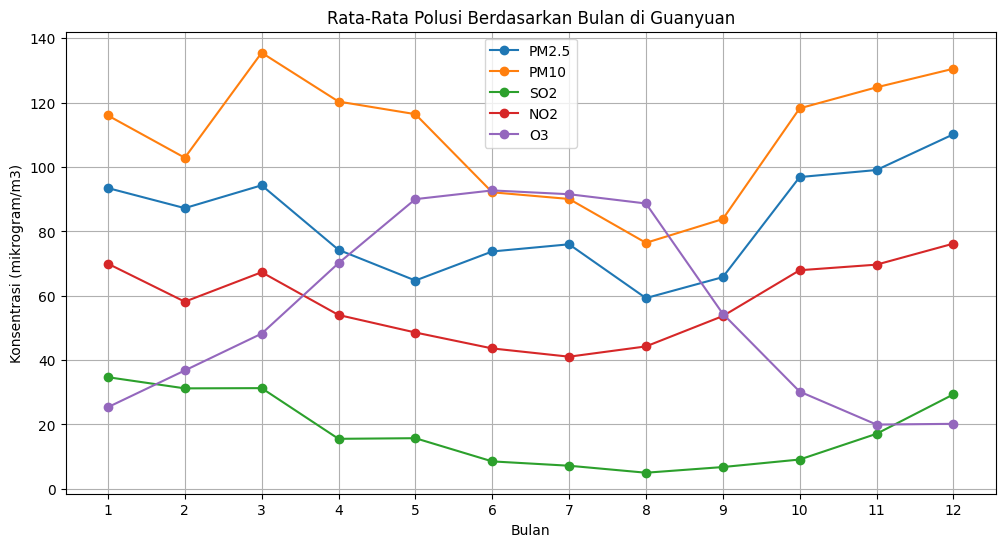

In [55]:
monthly_avg_guanyuan = guanyuanDf.groupby('month').mean(numeric_only=True)

plt.figure(figsize=(12,6))
plt.plot(monthly_avg_guanyuan.index, monthly_avg_guanyuan["PM2.5"], label="PM2.5", marker='o')
plt.plot(monthly_avg_guanyuan.index, monthly_avg_guanyuan["PM10"], label="PM10", marker='o')
plt.plot(monthly_avg_guanyuan.index, monthly_avg_guanyuan["SO2"], label="SO2", marker='o')
plt.plot(monthly_avg_guanyuan.index, monthly_avg_guanyuan["NO2"], label="NO2", marker='o')
plt.plot(monthly_avg_guanyuan.index, monthly_avg_guanyuan["O3"], label="O3", marker='o')
plt.xlabel("Bulan")
plt.ylabel("Konsentrasi (mikrogram/m3)")
plt.title("Rata-Rata Polusi Berdasarkan Bulan di Guanyuan")
plt.xticks(monthly_avg_guanyuan.index)
plt.legend()
plt.grid()
plt.show()

**Insight:**
- Berdasarkan analisis data, bulan Maret(3) memiliki tingkat polusi udara tertinggi di Guanyuan, dengan rata-rata PM2.5 sebesar 45 μg/m3

- Berdasarkan Musim

<Figure size 1000x600 with 0 Axes>

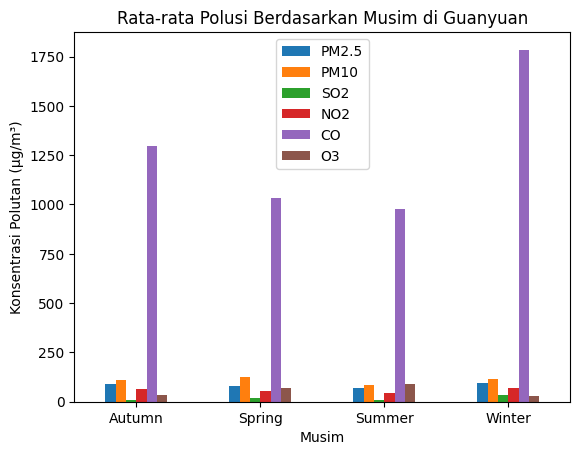

In [56]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

guanyuanDf['season'] = guanyuanDf['month'].map(get_season)

seasonal_avg_pollution = guanyuanDf.groupby('season')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

plt.figure(figsize=(10, 6))
seasonal_avg_pollution.plot(kind='bar')
plt.title('Rata-rata Polusi Berdasarkan Musim di Guanyuan')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.xlabel('Musim')
plt.xticks(rotation=0)
plt.show()


**Insight:**
- Musim dingin memiliki tingkat polusi tertinggi, terutama untuk PM2.5 dan PM10
- Polutan SO2, NO2, CO, dan O3 memiliki konsentrasi yang lebih rendah secara keseluruhan dibandingkan PM2.5 dan PM10

### Pertanyaan 2: Bagaimana tren kualitas udara harian di Guanyuan? (Apakah ada hari tertentu dalam seminggu di mana kualitas udara cenderung lebih buruk?)

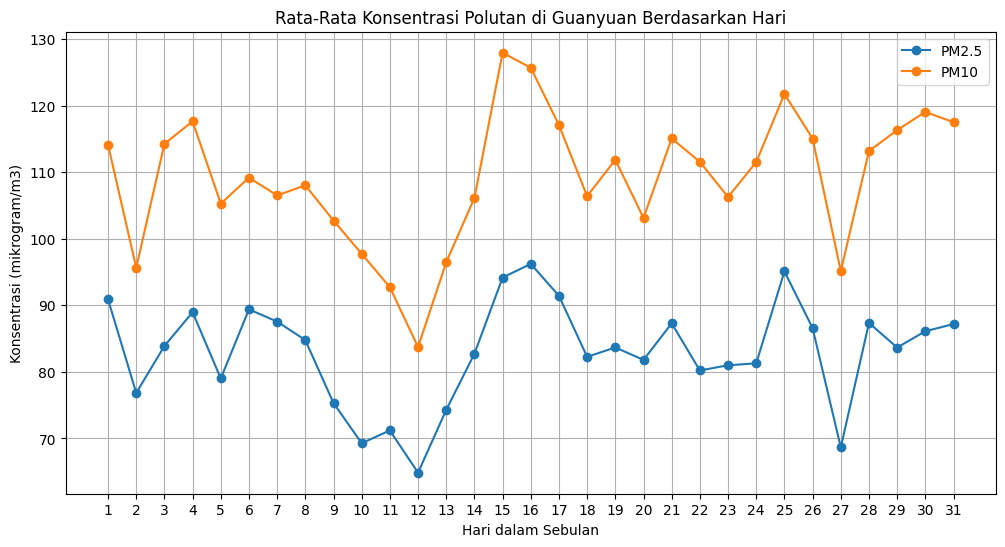

In [57]:
daily_avg_guanyuan = guanyuanDf.groupby('day').mean(numeric_only=True)

plt.figure(figsize=(12,6))
plt.plot(daily_avg_guanyuan.index, daily_avg_guanyuan["PM2.5"], label="PM2.5", marker='o')
plt.plot(daily_avg_guanyuan.index, daily_avg_guanyuan["PM10"], label="PM10", marker='o')
plt.xlabel("Hari dalam Sebulan")
plt.ylabel("Konsentrasi (mikrogram/m3)")
plt.title("Rata-Rata Konsentrasi Polutan di Guanyuan Berdasarkan Hari")
plt.xticks(daily_avg_guanyuan.index)
plt.legend()
plt.grid()
plt.show()


**Insight:**
- Dari grafik harian, terlihat bahwa PM10 secara konsisten memiliki konsentrasi lebih tinggi dibandingkan PM2.5. Lonjakan signifikan terjadi sekitar hari ke-14 dan ke-25, terutama untuk PM10. Namun, tidak ada pola yang menunjukkan bahwa hari-hari tertentu dalam seminggu secara konsisten memiliki kualitas udara lebih buruk

### Pertanyaan 3: Apakah ada hubungan antara konsentrasi polutan (PM2.5, PM10, SO2, NO2, CO, O3) dengan variabel cuaca seperti suhu, tekanan udara, titik embun, hujan, arah angin, dan kecepatan angin di Guanyuan?

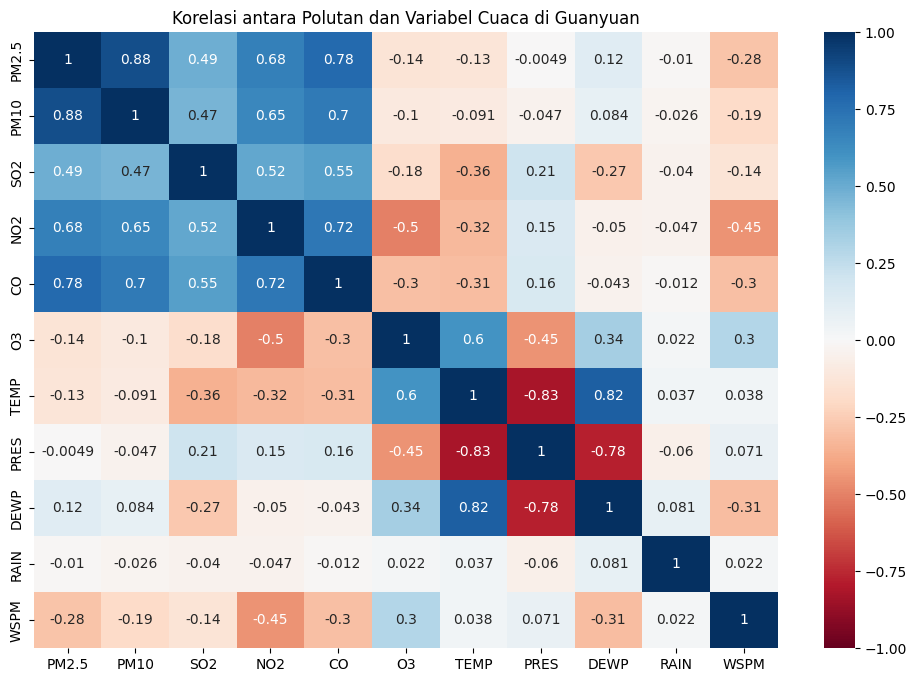

In [58]:
# Hitung korelasi antara polutan dan variabel cuaca
correlation_matrix = guanyuanDf[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

# Plot heatmap dari matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Korelasi antara Polutan dan Variabel Cuaca di Guanyuan')
plt.show()


**Insight:**
- Secara keseluruhan, variabel cuaca seperti suhu dan tekanan udara memiliki hubungan yang bervariasi dengan polutan, di mana beberapa polutan (seperti CO dan PM) lebih sensitif terhadap perubahan cuaca dibandingkan yang lain

## Conclusion

- Conclution pertanyaan 1
  Berdasarkan analisis data bulanan, bulan Maret (3) memiliki tingkat polusi udara tertinggi di Guanyuan, dengan rata-rata PM2.5 sebesar 45 μg/m³. Selain itu, musim dingin mencatat tingkat polusi yang paling tinggi, terutama untuk polutan PM2.5 dan PM10. Secara keseluruhan, polutan SO2, NO2, CO, dan O3 menunjukkan konsentrasi yang lebih rendah dibandingkan dengan PM2.5 dan PM10, menandakan bahwa perhatian utama dalam pengendalian polusi harus tertuju pada kedua polutan ini

- Conclution pertanyaan 2
  Terlihat bahwa konsentrasi PM10 secara konsisten lebih tinggi dibandingkan dengan PM2.5. Terdapat lonjakan signifikan pada hari ke-14 dan ke-25, khususnya untuk PM10. Namun, tidak ada pola yang jelas yang menunjukkan bahwa hari-hari tertentu dalam seminggu secara konsisten memiliki kualitas udara yang lebih buruk, menunjukkan bahwa fluktuasi polusi lebih dipengaruhi oleh faktor lain selain hari dalam seminggu

- Conclution pertanyaan 3
  Terdapat hubungan yang kuat antara konsentrasi polutan, terutama antara PM2.5, PM10, dan CO, yang menunjukkan bahwa ketiga polutan ini cenderung meningkat bersamaan. Polutan O3 memiliki hubungan positif dengan suhu, tetapi menunjukkan korelasi negatif dengan PM2.5 dan PM10. Selain itu, tekanan udara dan suhu memiliki pengaruh signifikan terhadap variasi beberapa polutan, dengan tekanan udara yang rendah sering dikaitkan dengan polusi yang lebih tinggi